# Checking out some instances to check if everything works fine

In [4]:
# import the stuff
from cetsp_bnb2 import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution, compute_tour_from_sequence

In [5]:
# Load instances
import aemeasure
db_ = aemeasure.Database("instance_db")
data = db_.load()
instances = {instance["instance"]: instance  for instance in data}

In [6]:
list(instances.keys())

['rnd_ol01/CETSP-70-2',
 'rnd_ol01/CETSP-30-4',
 'rnd_ol01/CETSP-190-1',
 'rnd_ol01/CETSP-30-3',
 'rnd_ol01/CETSP-150-2',
 'rnd_ol01/CETSP-110-3',
 'rnd_ol01/CETSP-110-4',
 'rnd_ol01/CETSP-30-2',
 'rnd_ol01/CETSP-190-0',
 'rnd_ol01/CETSP-70-3',
 'rnd_ol01/CETSP-70-4',
 'rnd_ol01/CETSP-110-2',
 'rnd_ol01/CETSP-150-4',
 'rnd_ol01/CETSP-150-3',
 'rnd_ol01/CETSP-20-2',
 'rnd_ol01/CETSP-180-0',
 'rnd_ol01/CETSP-60-3',
 'rnd_ol01/CETSP-60-4',
 'rnd_ol01/CETSP-100-2',
 'rnd_ol01/CETSP-200-3',
 'rnd_ol01/CETSP-140-4',
 'rnd_ol01/CETSP-140-3',
 'rnd_ol01/CETSP-200-4',
 'rnd_ol01/CETSP-60-2',
 'rnd_ol01/CETSP-20-4',
 'rnd_ol01/CETSP-180-1',
 'rnd_ol01/CETSP-20-3',
 'rnd_ol01/CETSP-140-2',
 'rnd_ol01/CETSP-200-2',
 'rnd_ol01/CETSP-100-3',
 'rnd_ol01/CETSP-100-4',
 'rnd_ol01/CETSP-130-1',
 'rnd_ol01/CETSP-90-4',
 'rnd_ol01/CETSP-90-3',
 'rnd_ol01/CETSP-170-0',
 'rnd_ol01/CETSP-10-1',
 'rnd_ol01/CETSP-50-0',
 'rnd_ol01/CETSP-170-1',
 'rnd_ol01/CETSP-90-2',
 'rnd_ol01/CETSP-130-0',
 'rnd_ol01/CETSP-

In [7]:
instance = Instance([Circle(Point(float(d["x"]), float(d["y"])), float(d["radius"])) for d in instances['rnd_ol01/CETSP-110-4']["circles"]])

Removed implicit circle (0.272911, 42.5807
Removed implicit circle (45.7268, 56.5421
Removed implicit circle (2.45526, 48.1252
Removed implicit circle (2.97729, 44.2941
Removed implicit circle (7.79654, 42.5769
Removed implicit circle (9.19483, 53.9758
Removed implicit circle (72.6582, 71.3751
Removed implicit circle (2.20503, 93.1923
Removed implicit circle (62.8268, 24.6156
Removed implicit circle (61.5733, 33.612
Removed implicit circle (58.2171, 47.2085
Removed implicit circle (2.77384, 42.195
Removed implicit circle (2.21863, 86.2603
Removed implicit circle (68.5683, 20.6121
Removed implicit circle (36.0789, 85.5589
Removed implicit circle (60.2827, 98.8947
Removed implicit circle (28.9743, 59.5455
Removed implicit circle (77.8474, 99.8837
Removed implicit circle (25.7801, 67.1107
Removed implicit circle (58.2391, 82.7352
Removed implicit circle (64.9964, 85.412
Removed implicit circle (67.8279, 83.6276
Removed implicit circle (67.5439, 55.6942
Removed implicit circle (24.7811, 85

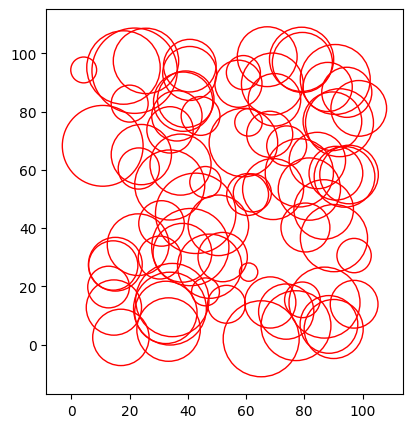

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [9]:
# trigger_lazy_computation an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13


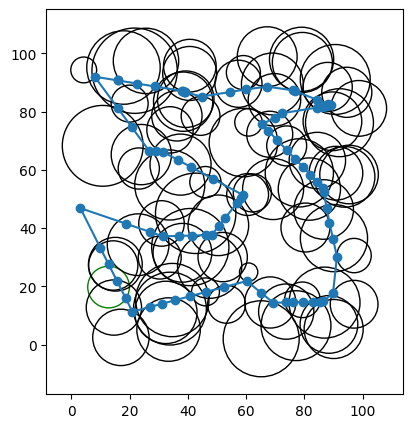

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution, highlight=[15])

Using ChFarthestCircle-Branching
Starting with root node of size 12
i	LB	|	UB


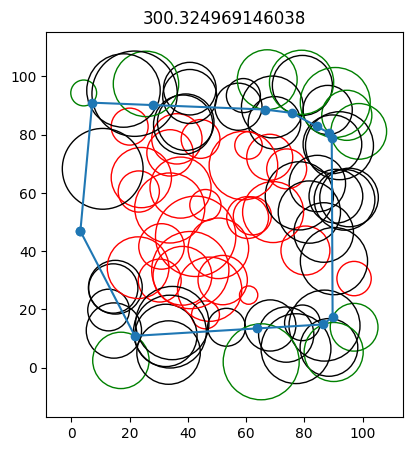

0	324.648	|	420.468
1	333.533	|	420.468
2	336.274	|	420.468
3	336.274	|	420.468
4	336.274	|	420.468
5	336.274	|	420.468
6	336.274	|	420.468
7	336.274	|	420.468
8	336.274	|	420.468
9	336.274	|	420.468
10	336.274	|	420.468
20	336.274	|	420.468
30	340.24	|	380.328
40	342.148	|	380.328
50	342.166	|	380.328
60	343.555	|	380.328
70	345.589	|	380.328
80	347.509	|	380.328
90	349.937	|	380.328


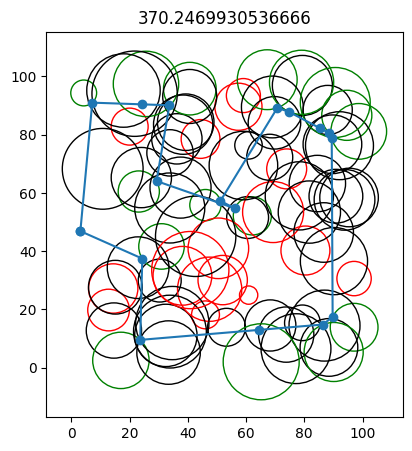

100	351.293	|	380.328


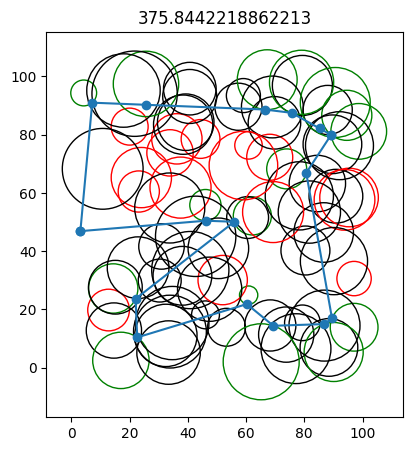

200	362.318	|	380.328


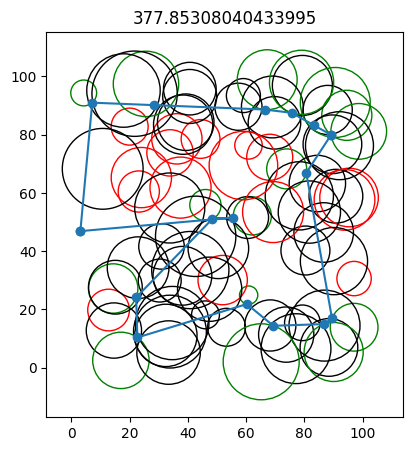

300	365.853	|	380.328


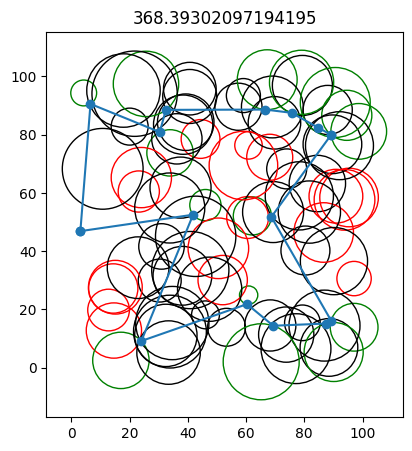

400	368.465	|	380.328


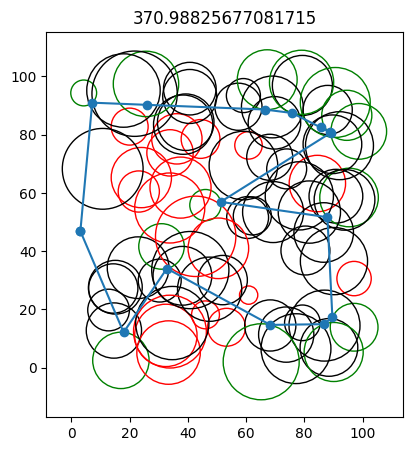

500	371.113	|	380.328


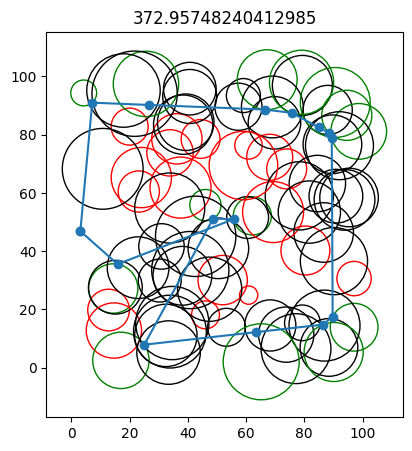

600	373.005	|	380.328
700	374.502	|	380.328
800	376.014	|	380.328
---------------
862	376.592	|	380.328


In [11]:
timelimit = 220
node_values = []
def count(event):
    global node_values
    node_values.append(event.current_node.get_relaxed_solution().length())
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    depth = event.current_node.depth()

    if event.num_iterations % 100 == 0:
        plt.figure(figsize=(5, 5))
        plot_solution(plt.gca(), instance, event.get_relaxed_solution(), highlight=event.current_node.get_fixed_sequence())
        plt.title(event.get_relaxed_solution().length())
        plt.show()
        
opt_solution, lb = branch_and_bound(instance, count, initial_solution, timelimit)

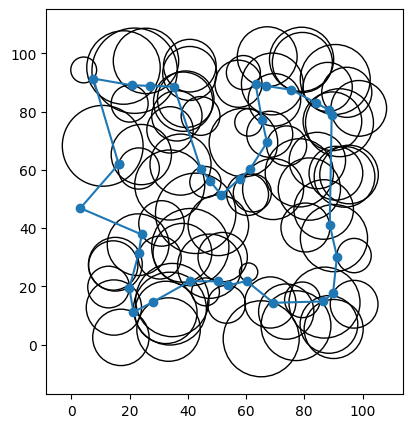

In [13]:
plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)